In [ ]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import datetime as dt

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


import warnings
warnings.filterwarnings('ignore')

import requests
import glob

In [ ]:
df1=pd.read_csv(r"/content/1990 - 1999.csv",header = 0)
df2=pd.read_csv(r"/content/2000 - Feb 2012.csv")
df3=pd.read_csv(r"/content/Mar 2012 to Dec 2014.csv")
df4=pd.read_csv(r"/content/Jan 2015 to Dec 2016.csv")
df5=pd.read_csv(r"/content/Jan-2017 onwards.csv")

df=pd.concat([df1,df2,df3,df4,df5], ignore_index=True)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
915348,2023-12,YISHUN,EXECUTIVE,606,YISHUN ST 61,07 TO 09,142.0,Apartment,1987,788888.0,63 years 01 month
915349,2023-12,YISHUN,EXECUTIVE,328,YISHUN RING RD,07 TO 09,142.0,Apartment,1988,798000.0,63 years 07 months
915350,2023-12,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,146.0,Maisonette,1987,838000.0,62 years 10 months
915351,2023-12,YISHUN,5 ROOM,348D,YISHUN AVE 11,04 TO 06,112.0,DBSS,2013,856000.0,88 years 10 months


In [ ]:
df.shape

(915353, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915353 entries, 0 to 915352
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                915353 non-null  object 
 1   town                 915353 non-null  object 
 2   flat_type            915353 non-null  object 
 3   block                915353 non-null  object 
 4   street_name          915353 non-null  object 
 5   storey_range         915353 non-null  object 
 6   floor_area_sqm       915353 non-null  float64
 7   flat_model           915353 non-null  object 
 8   lease_commence_date  915353 non-null  int64  
 9   resale_price         915353 non-null  float64
 10  remaining_lease      206303 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 76.8+ MB


In [ ]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
floor_area_sqm,915353.0,95.695684,25.847847,28.0,73.0,93.0,113.0,307.0
lease_commence_date,915353.0,1988.147295,10.530206,1966.0,1981.0,1986.0,1996.0,2020.0
resale_price,915353.0,317232.054090,167398.429032,5000.0,192000.0,295000.0,413000.0,1500000.0


In [ ]:
df['resale_price'].value_counts()

,count
resale_price,
300000.0,6891
350000.0,6772
280000.0,6538
320000.0,6486
250000.0,6279
...,...
181100.0,1
486588.0,1
580880.0,1


**Data Cleaning**

In [ ]:
df.nunique()

,0
month,408
town,27
flat_type,8
block,2699
street_name,584
storey_range,25
floor_area_sqm,210
flat_model,34
lease_commence_date,55
resale_price,9348


In [ ]:
df.isna().sum()

,0
month,0
town,0
flat_type,0
block,0
street_name,0
storey_range,0
floor_area_sqm,0
flat_model,0
lease_commence_date,0
resale_price,0


REMAINING_LEASE

In [ ]:
def convert_to_years(row):
    if pd.notna(row) and isinstance(row, str):
        if 'years' in row:
            parts = row.split()
            years = float(parts[0])
            months = float(parts[2]) if len(parts) > 2 else 0
            return years + months / 12
    return row

In [ ]:
df['remaining_lease'] =df['remaining_lease'].apply(convert_to_years)

In [ ]:
# fill null values in remaining_lease with mode beacuse null value more than 25% it will remove affected in accuracy
df['remaining_lease']=df['remaining_lease'].fillna(df['remaining_lease'].mode()[0])
df.tail()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
915348,2023-12,YISHUN,EXECUTIVE,606,YISHUN ST 61,07 TO 09,142.0,Apartment,1987,788888.0,63.083333
915349,2023-12,YISHUN,EXECUTIVE,328,YISHUN RING RD,07 TO 09,142.0,Apartment,1988,798000.0,63.583333
915350,2023-12,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,146.0,Maisonette,1987,838000.0,62.833333
915351,2023-12,YISHUN,5 ROOM,348D,YISHUN AVE 11,04 TO 06,112.0,DBSS,2013,856000.0,88.833333
915352,2023-12,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,01 TO 03,179.0,Multi Generation,1987,975000.0,63.083333


In [ ]:
df['remaining_lease'].value_counts()

,count
remaining_lease,
68.000000,711632
95.000000,2266
67.000000,2209
69.000000,1902
71.000000,1747
...,...
97.250000,1
97.583333,1
97.083333,1


In [ ]:
df.isnull().sum()

,0
month,0
town,0
flat_type,0
block,0
street_name,0
storey_range,0
floor_area_sqm,0
flat_model,0
lease_commence_date,0
resale_price,0


Wrong Formate

In [ ]:
df.dtypes

,0
month,object
town,object
flat_type,object
block,object
street_name,object
storey_range,object
floor_area_sqm,float64
flat_model,object
lease_commence_date,int64
resale_price,float64


In [ ]:
#Month column

# Separate the year and month of resale beacuse this is time series Data
df[['resale_year', 'resale_month']] =df['month'].str.split('-', expand=True)

# drop the resale month column
df.drop('month', axis = 1, inplace= True)

df.head(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month
0,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,68.0,1990,01
1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,68.0,1990,01


In [ ]:
# Split the 'Range' column into lower and upper bounds
df[['storey_lower_bound', 'storey_upper_bound']] = df['storey_range'].str.split(' TO ', expand=True)

# Convert the lower and upper bounds to numeric values
df['storey_lower_bound'] = pd.to_numeric(df['storey_lower_bound'])
df['storey_upper_bound'] = pd.to_numeric(df['storey_upper_bound'])

df.tail(2)

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
915351,YISHUN,5 ROOM,348D,YISHUN AVE 11,04 TO 06,112.0,DBSS,2013,856000.0,88.833333,2023,12,4,6
915352,YISHUN,MULTI-GENERATION,666,YISHUN AVE 4,01 TO 03,179.0,Multi Generation,1987,975000.0,63.083333,2023,12,1,3


In [ ]:
df.drop('storey_range', axis = 1, inplace= True)

In [ ]:
# CONVERTING

df['block'] = pd.to_numeric(df['block'], errors='coerce')
df['resale_year'] = pd.to_numeric(df['resale_year'], errors='coerce')
df['resale_month'] = pd.to_numeric(df['resale_month'], errors='coerce')
df['block'] = df['block'].fillna(df['block'].mode()[0])

In [ ]:
df.head()

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,68.0,1990,1,4,6
2,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,8000.0,68.0,1990,1,10,12
3,ANG MO KIO,1 ROOM,309.0,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,68.0,1990,1,7,9
4,ANG MO KIO,3 ROOM,216.0,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,47200.0,68.0,1990,1,4,6


In [ ]:
df.dtypes

,0
town,object
flat_type,object
block,float64
street_name,object
floor_area_sqm,float64
flat_model,object
lease_commence_date,int64
resale_price,float64
remaining_lease,float64
resale_year,int64


TEXT ERRORS

In [ ]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [ ]:
df['town'].value_counts()

,count
town,
TAMPINES,79133
YISHUN,69255
BEDOK,66081
JURONG WEST,65824
WOODLANDS,64673
ANG MO KIO,51657
HOUGANG,50070
BUKIT BATOK,43676
CHOA CHU KANG,37768


In [ ]:
df['flat_type'].value_counts()

,count
flat_type,
4 ROOM,347292
3 ROOM,293085
5 ROOM,192720
EXECUTIVE,68928
2 ROOM,11489
1 ROOM,1300
MULTI GENERATION,279
MULTI-GENERATION,260


In [ ]:
# Replace 'MULTI-GENERATION' with 'MULTI GENERATION' in the specified column to avoid duplicate
df['flat_type'] = df['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')

In [ ]:
df['flat_type'].value_counts()


,count
flat_type,
4 ROOM,347292
3 ROOM,293085
5 ROOM,192720
EXECUTIVE,68928
2 ROOM,11489
1 ROOM,1300
MULTI GENERATION,539


In [ ]:
df['street_name'].value_counts()

,count
street_name,
YISHUN RING RD,17454
BEDOK RESERVOIR RD,14616
ANG MO KIO AVE 10,13717
ANG MO KIO AVE 3,12067
HOUGANG AVE 8,9287
...,...
OUTRAM HILL,9
YISHUN ST 43,6
TAMPINES ST 61,6


In [ ]:
df['flat_model'].value_counts()

,count
flat_model,
Model A,190021
Improved,165442
New Generation,108720
NEW GENERATION,78898
IMPROVED,73589
MODEL A,70381
Premium Apartment,45594
Simplified,33881
Apartment,25218


In [ ]:
df['flat_model'] = df['flat_model'].replace({'MODEL A':'Model A','NEW GENERATION':'New Generation',
                                             'IMPROVED':'Improved','PREMIUM APARTMENT':'Premium Apartment',
                                             'MULTI GENERATION':'Multi Generation ','2-ROOM':'2-room',
                                            'SIMPLIFIED':'Simplified','STANDARD':'Standard',
                                             'MAISONETTE':'Maisonette','MULTI GENERATION':'Multi Generation',
                                             'APARTMENT':'Apartment','MODEL A-MAISONETTE':'Model A-Maisonette',
                                             'TERRACE':'Terrace','IMPROVED-MAISONETTE':'Improved-Maisonette'})

In [ ]:
df['flat_model'].value_counts()

,count
flat_model,
Model A,260402
Improved,239031
New Generation,187618
Simplified,57139
Premium Apartment,45600
Standard,42281
Apartment,35119
Maisonette,29362
Model A2,10008


Duplicates

In [ ]:
df.duplicated().sum()

np.int64(2325)

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

Outliers

In [ ]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_colsfloat_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['block', 'floor_area_sqm', 'resale_price', 'remaining_lease']

In [ ]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['lease_commence_date',
 'resale_year',
 'resale_month',
 'storey_lower_bound',
 'storey_upper_bound']

Using Boxplot

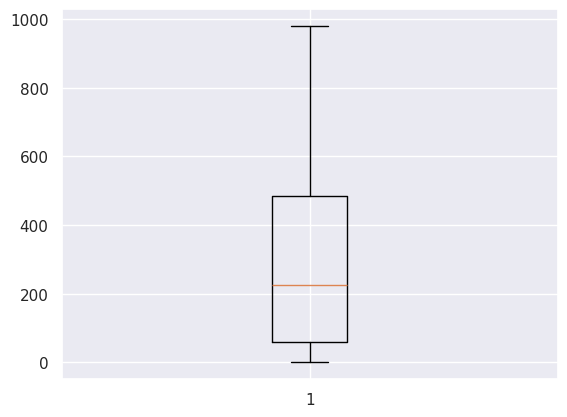

In [ ]:
# Creating plot
plt.boxplot(df['block'] )

# show plot
plt.show()

In [ ]:
  # IQR

Q1 = df['block'].quantile(0.25)
Q3 = df['block'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(np.float64(-581.5), np.float64(1126.5))

In [ ]:
df.block = df.block.clip(lower_bound , upper_bound)

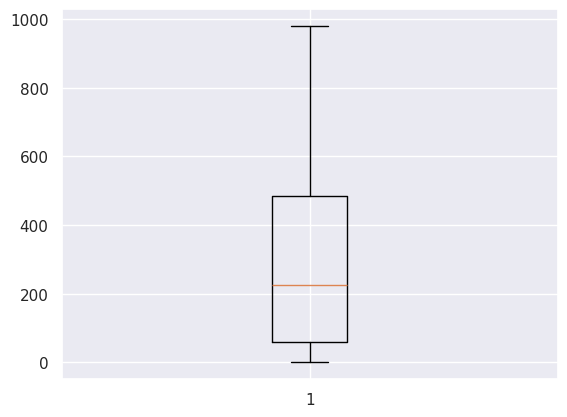

In [ ]:
# Creating plot
plt.boxplot(df['block'] )

# show plot
plt.show()

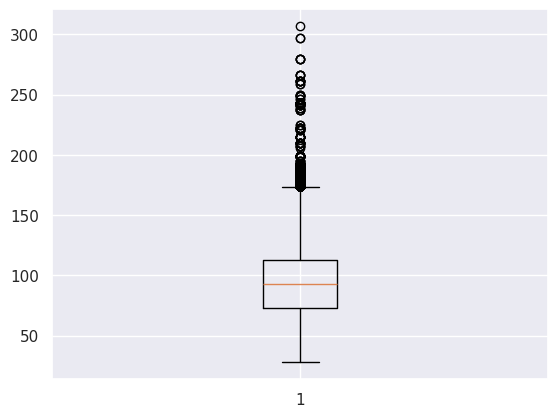

In [ ]:
# Creating plot
plt.boxplot(df['floor_area_sqm'] )

# show plot
plt.show()

In [ ]:
Q1 = df['floor_area_sqm'].quantile(0.25)
Q3 = df['floor_area_sqm'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(np.float64(13.0), np.float64(173.0))

In [ ]:
df.floor_area_sqm = df.floor_area_sqm.clip(lower_bound , upper_bound)

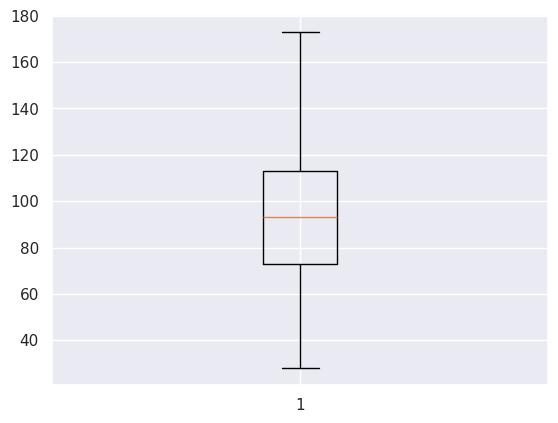

In [ ]:
# Creating plot
plt.boxplot(df['floor_area_sqm'] )

# show plot
plt.show()

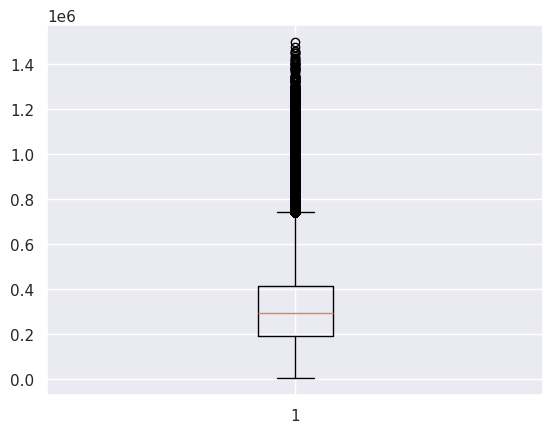

In [ ]:
# Creating plot
plt.boxplot(df['resale_price'] )

# show plot
plt.show()

In [ ]:
Q1 = df['resale_price'].quantile(0.25)
Q3 = df['resale_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(np.float64(-139332.0), np.float64(744220.0))

In [ ]:
df.resale_price = df.resale_price.clip(lower_bound , upper_bound)

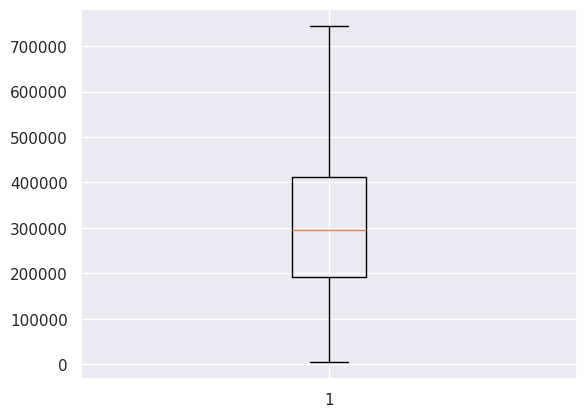

In [ ]:
# Creating plot
plt.boxplot(df['resale_price'] )

# show plot
plt.show()

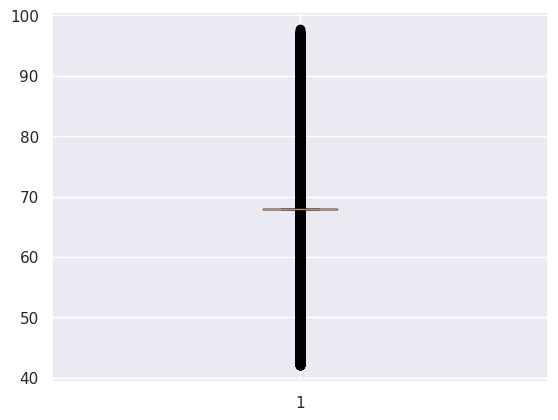

In [ ]:
# Creating plot
plt.boxplot(df['remaining_lease'] )

# show plot
plt.show()

In [ ]:
Q1 = df['remaining_lease'].quantile(0.25)
Q3 = df['remaining_lease'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(np.float64(68.0), np.float64(68.0))

In [ ]:
df.remaining_lease = df.remaining_lease.clip(lower_bound , upper_bound)

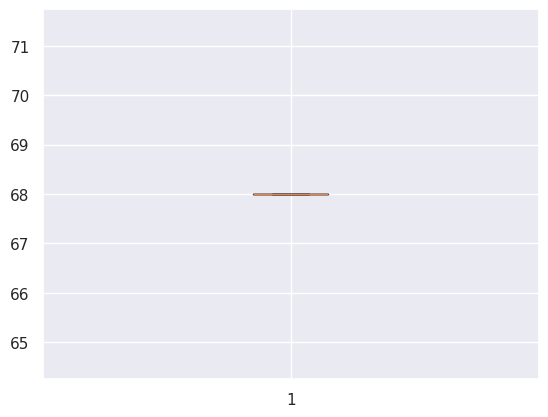

In [ ]:
# Creating plot
plt.boxplot(df['remaining_lease'] )

# show plot
plt.show()

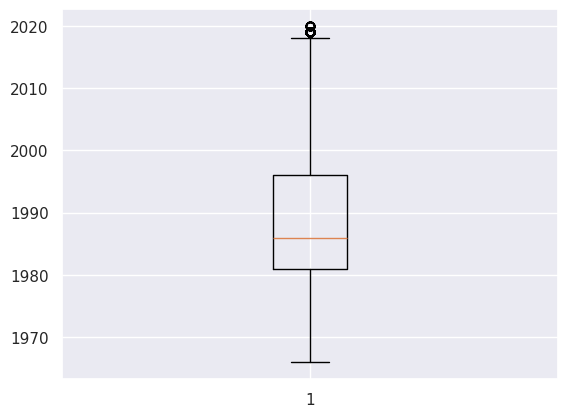

In [ ]:
# Creating plot
plt.boxplot(df['lease_commence_date'] )

# show plot
plt.show()

In [ ]:
Q1 = df['lease_commence_date'].quantile(0.25)
Q3 = df['lease_commence_date'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(np.float64(1958.5), np.float64(2018.5))

In [ ]:
df.lease_commence_date = df.lease_commence_date.clip(lower_bound , upper_bound)

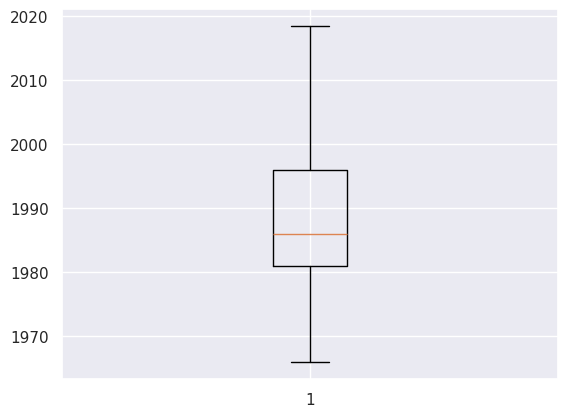

In [ ]:
# Creating plot
plt.boxplot(df['lease_commence_date'] )

# show plot
plt.show()

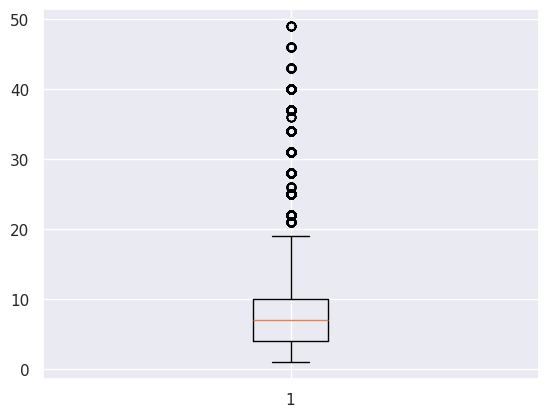

In [ ]:
# Creating plot
plt.boxplot(df['storey_lower_bound'] )

# show plot
plt.show()

In [ ]:
Q1 = df['storey_lower_bound'].quantile(0.25)
Q3 = df['storey_lower_bound'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(np.float64(-5.0), np.float64(19.0))

In [ ]:
df.storey_lower_bound = df.storey_lower_bound.clip(lower_bound , upper_bound)

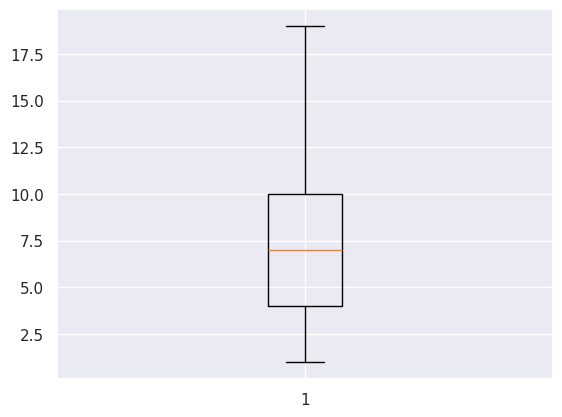

In [ ]:
# Creating plot
plt.boxplot(df['storey_lower_bound'] )

# show plot
plt.show()

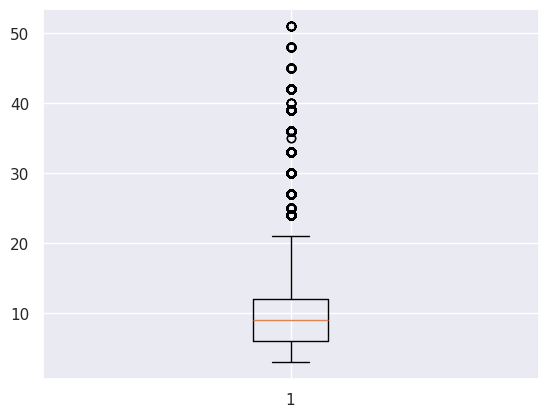

In [ ]:
# Creating plot
plt.boxplot(df['storey_upper_bound'] )

# show plot
plt.show()

In [ ]:
Q1 = df['storey_upper_bound'].quantile(0.25)
Q3 = df['storey_upper_bound'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound , upper_bound

(np.float64(-3.0), np.float64(21.0))

In [ ]:
df.storey_upper_bound = df.storey_upper_bound.clip(lower_bound , upper_bound)

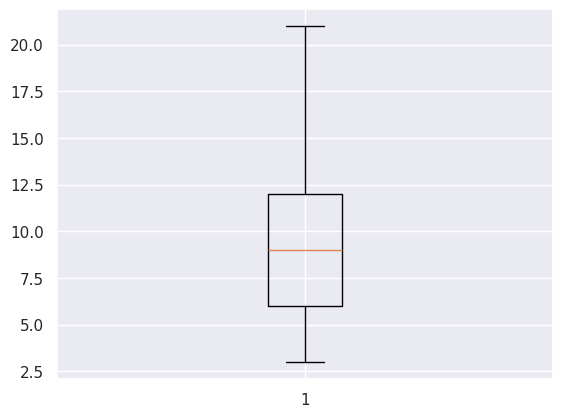

In [ ]:
# Creating plot
plt.boxplot(df['storey_upper_bound'] )

# show plot
plt.show()

 **EDA - EXPLORATARY DATA ANALYSIS**

Categorical Vs Frequency using BarPlot

In [ ]:
object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

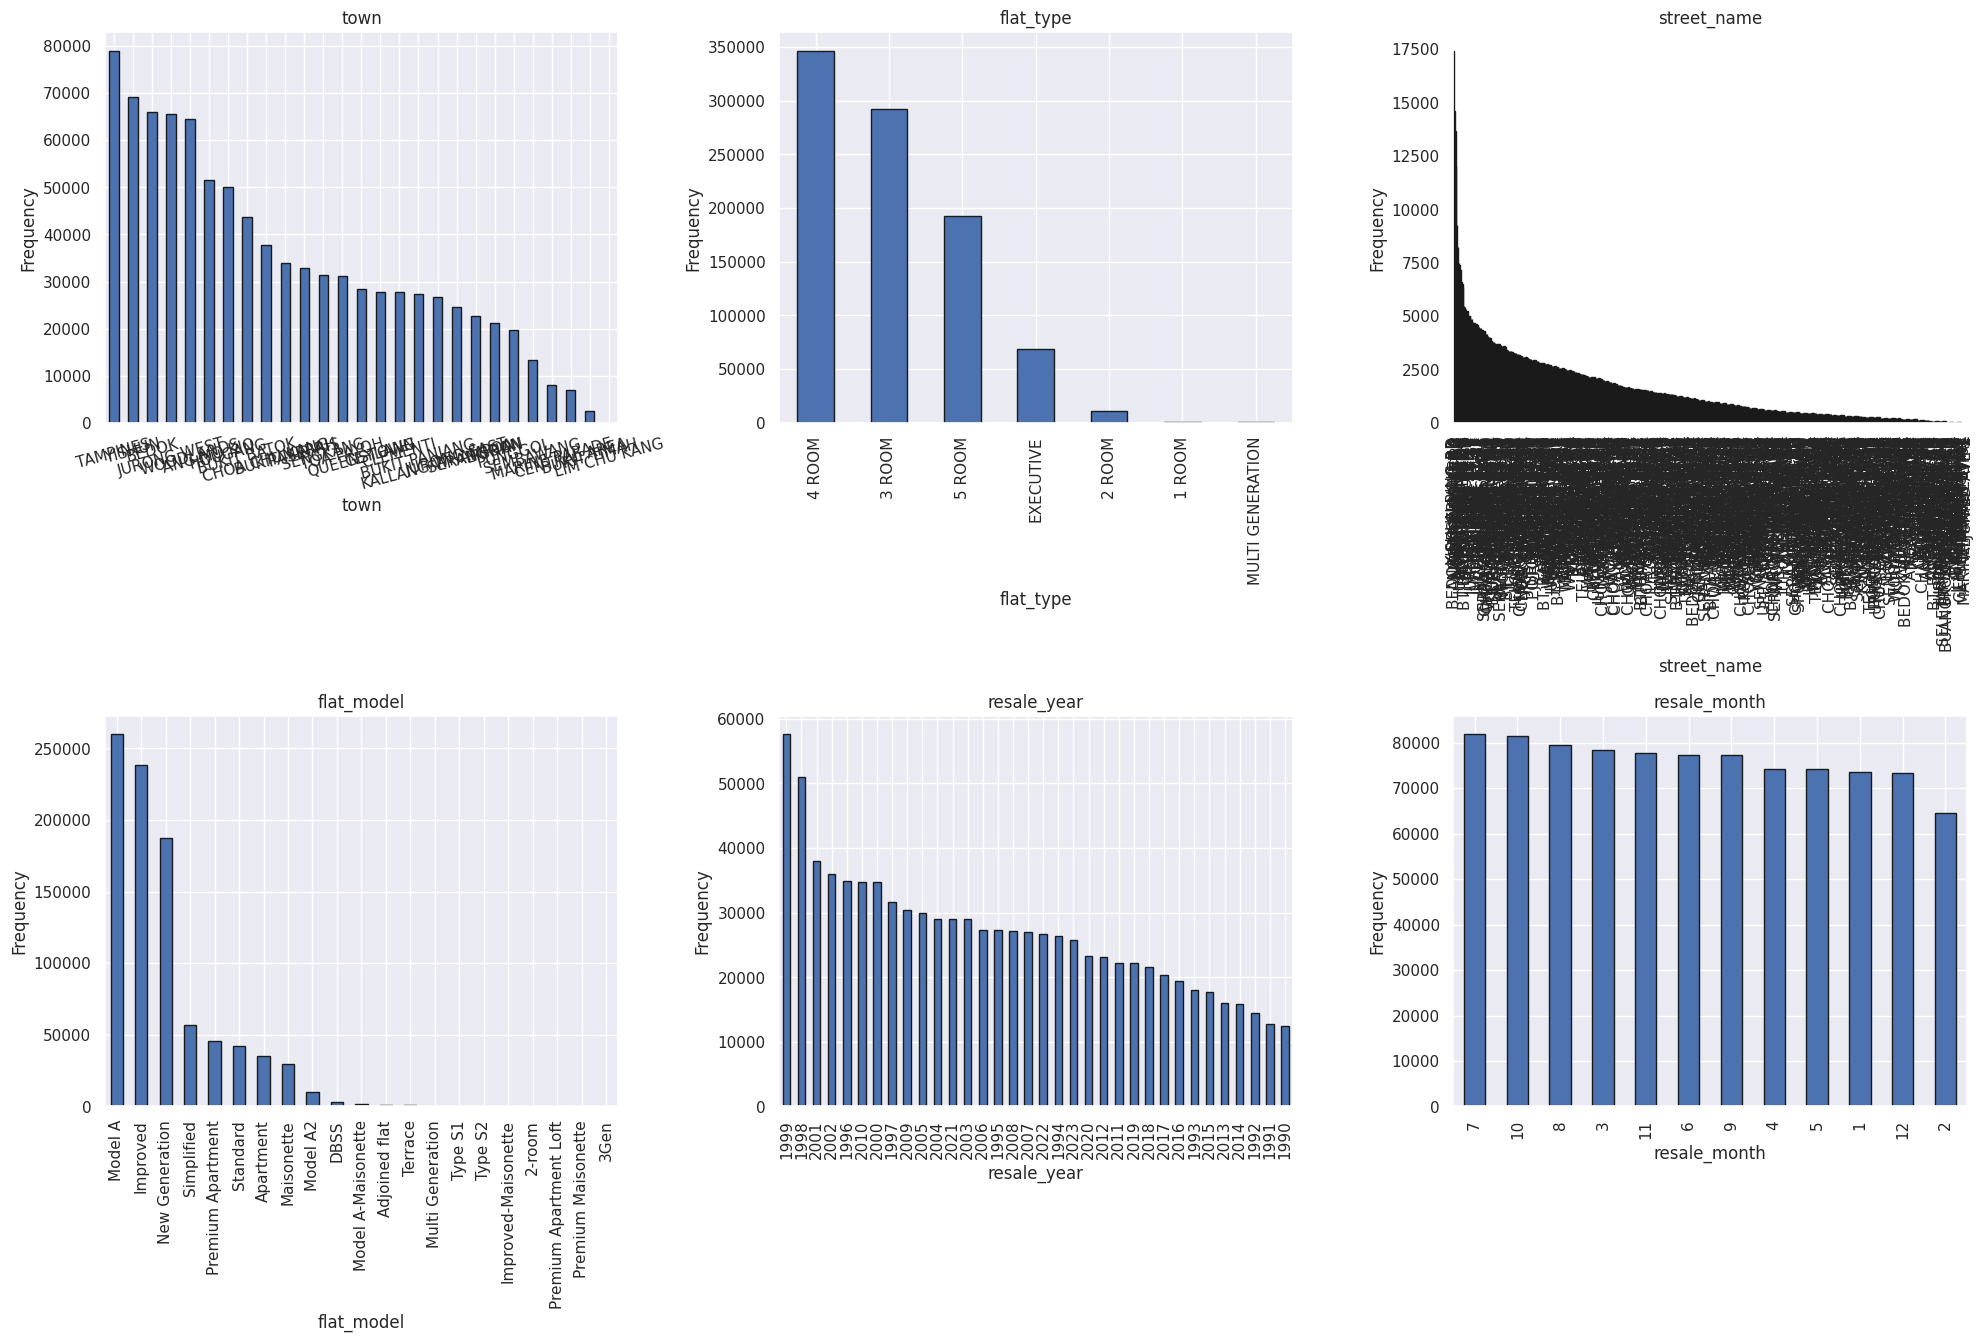

In [ ]:
plt.figure(figsize=(20, 25))



plt.subplot(431)
df['town'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('town')
plt.xlabel('town')
plt.ylabel('Frequency')
plt.xticks(rotation=15)

plt.subplot(432)
df['flat_type'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('flat_type')
plt.xlabel('flat_type')
plt.ylabel('Frequency')

plt.subplot(433)
df['street_name'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('street_name')
plt.xlabel('street_name')
plt.ylabel('Frequency')

plt.subplot(434)
df['flat_model'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('flat_model')
plt.xlabel('flat_model')
plt.ylabel('Frequency')

plt.subplot(435)
df['resale_year'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('resale_year')
plt.xlabel('resale_year')
plt.ylabel('Frequency')

plt.subplot(436)
df['resale_month'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('resale_month')
plt.xlabel('resale_month')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Feature Vs Target (Categorical Data )**

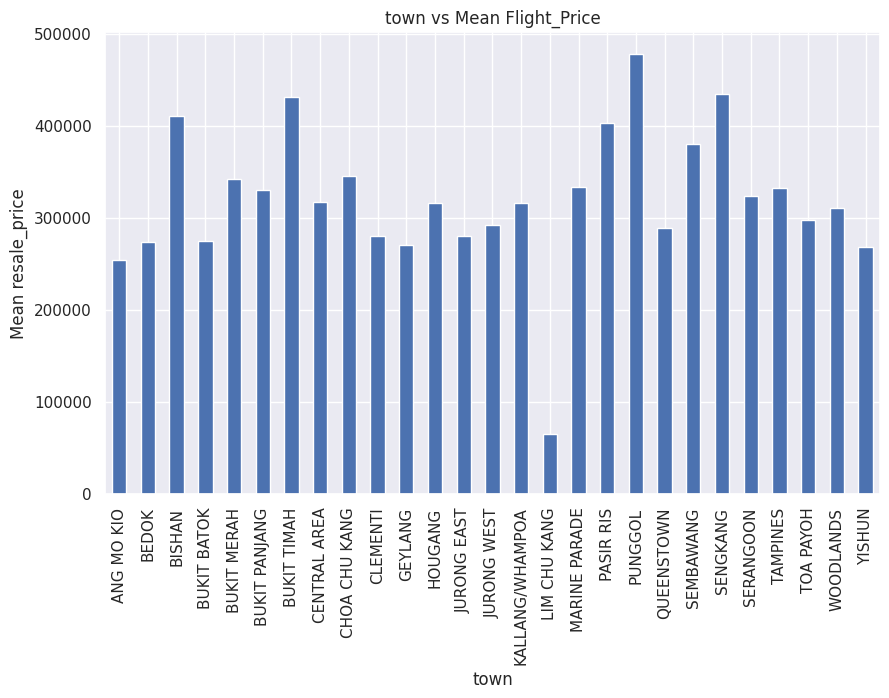

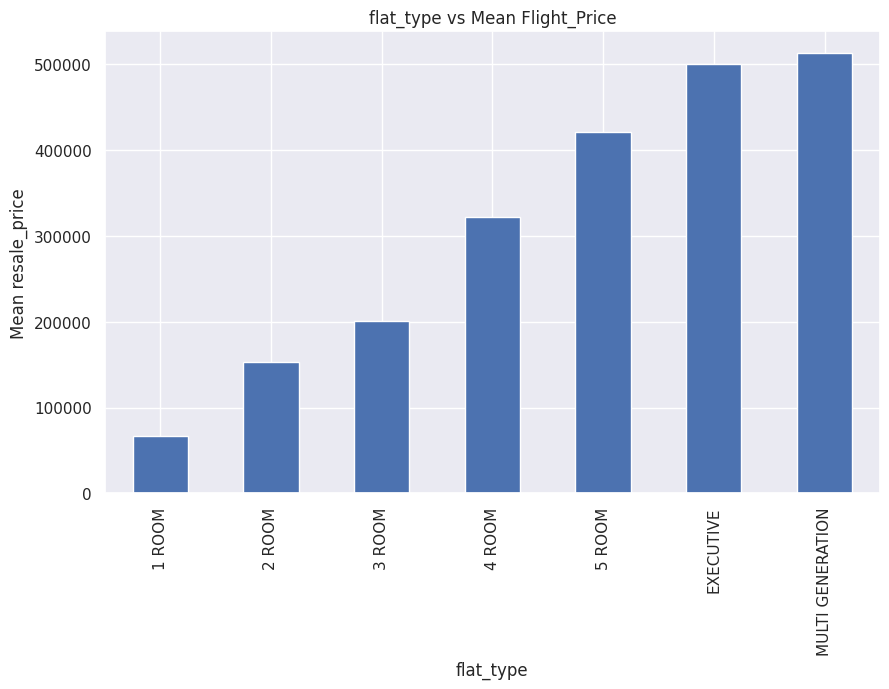

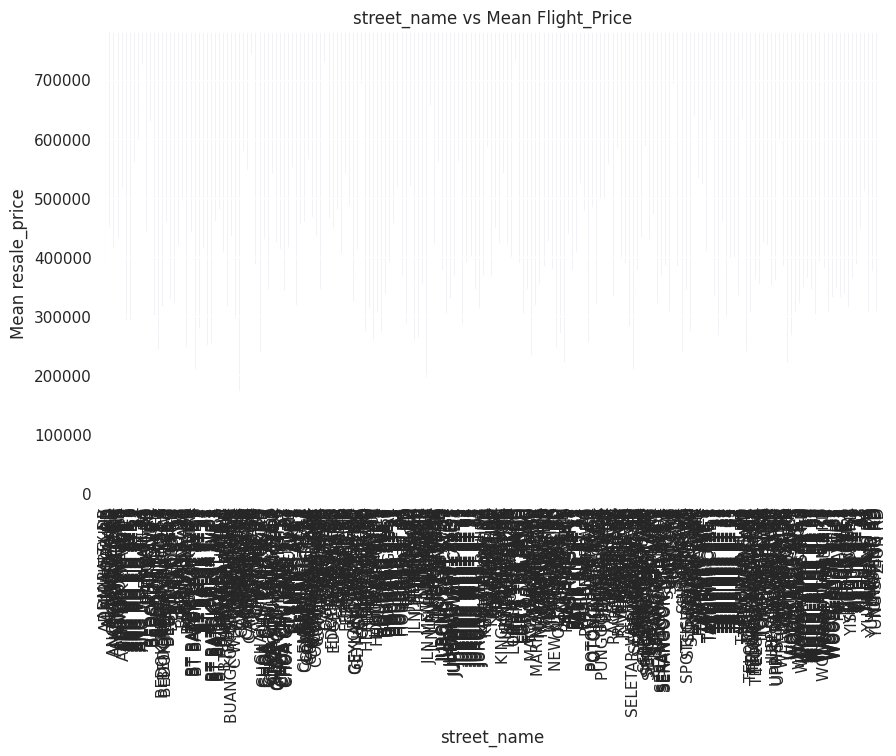

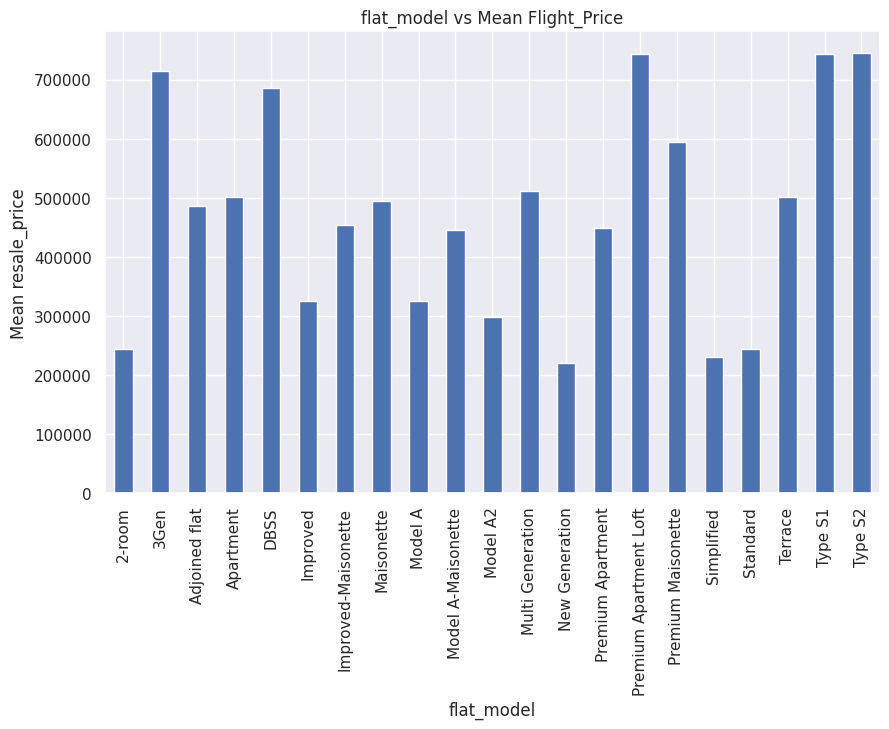

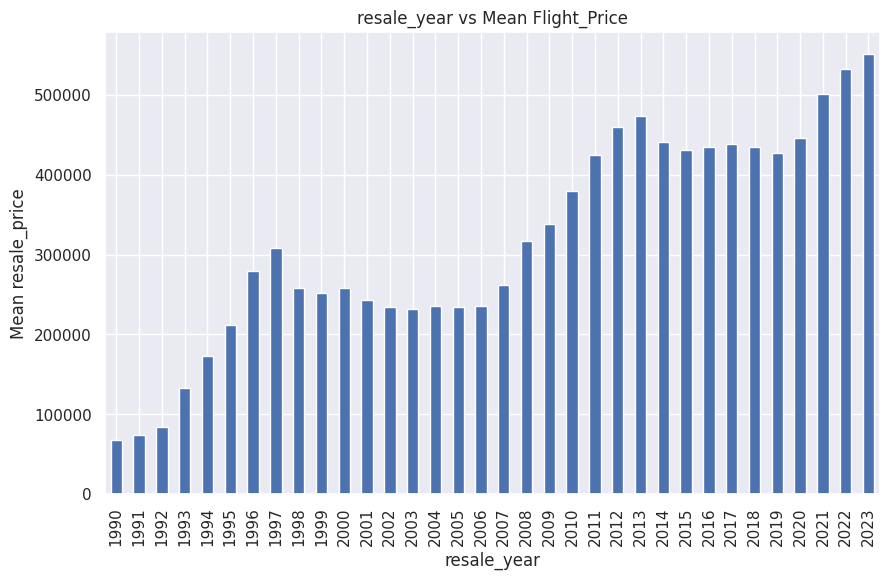

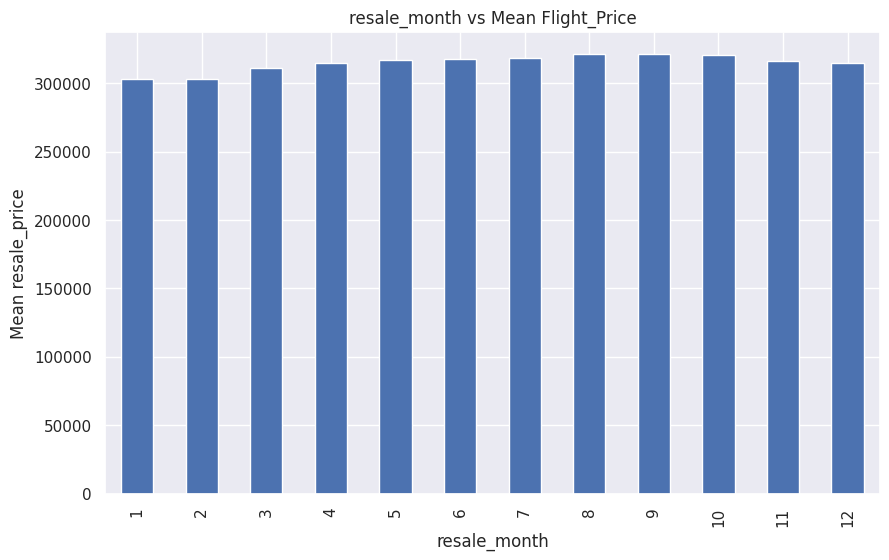

In [ ]:
# List of features to plot
features = [
    'town',
 'flat_type',
 'street_name',
 'flat_model',
 'resale_year',
 'resale_month'
]
for feature in features:
    plt.figure(figsize=(10, 6))
    df.groupby(feature)['resale_price'].mean().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Mean resale_price')
    plt.title(f'{feature} vs Mean Flight_Price')
    plt.show()

**Feature Vs Target (Condinues Data )**

In [ ]:
float_data_cols = [var for var in df.columns if df[var].dtype == 'float64']
float_data_cols

['block',
 'floor_area_sqm',
 'lease_commence_date',
 'resale_price',
 'remaining_lease']

In [ ]:
integer_data_cols = [var for var in df.columns if df[var].dtype == 'int64']
integer_data_cols

['resale_year', 'resale_month', 'storey_lower_bound', 'storey_upper_bound']

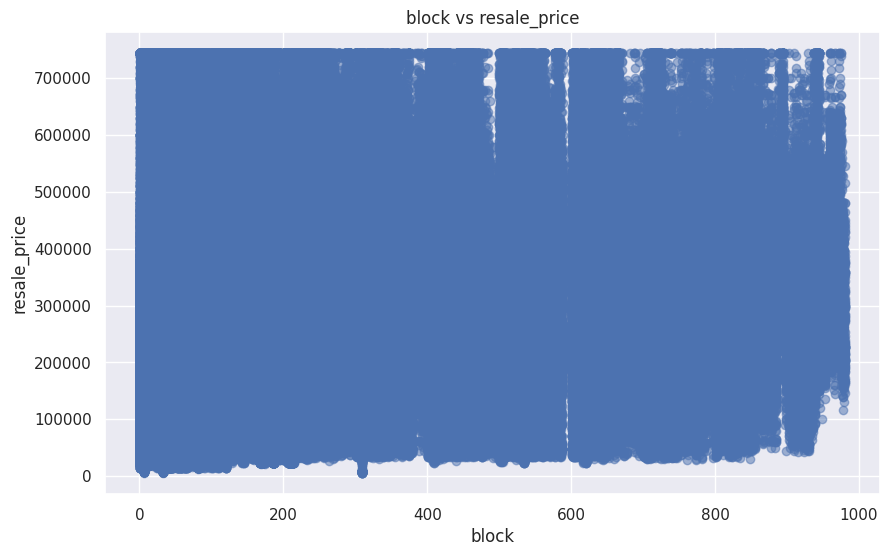

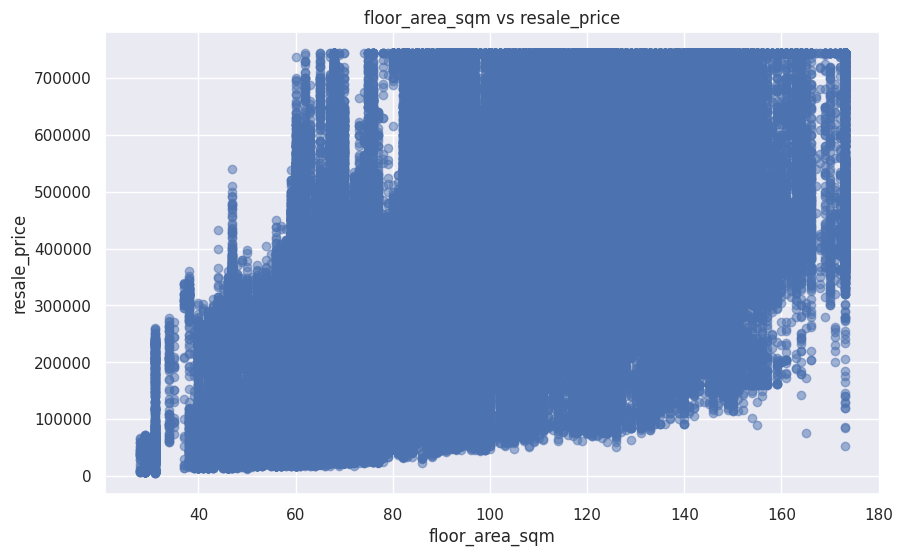

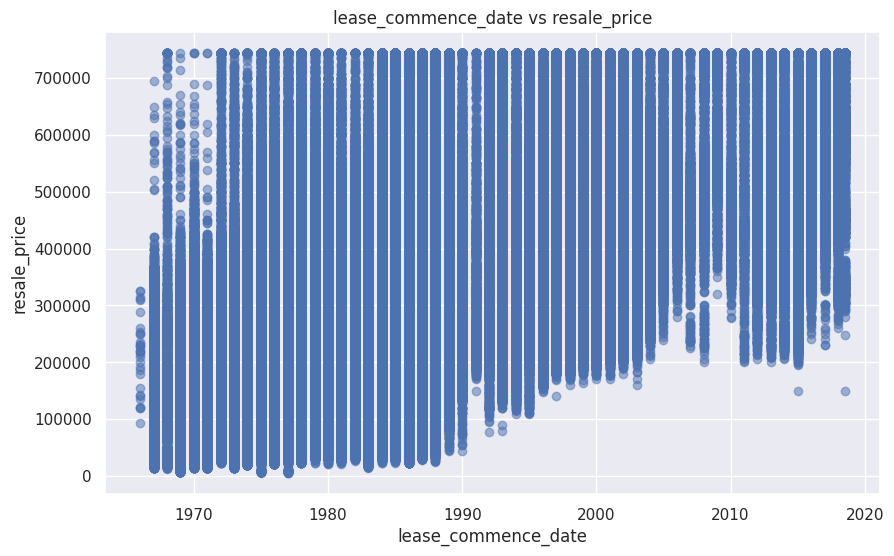

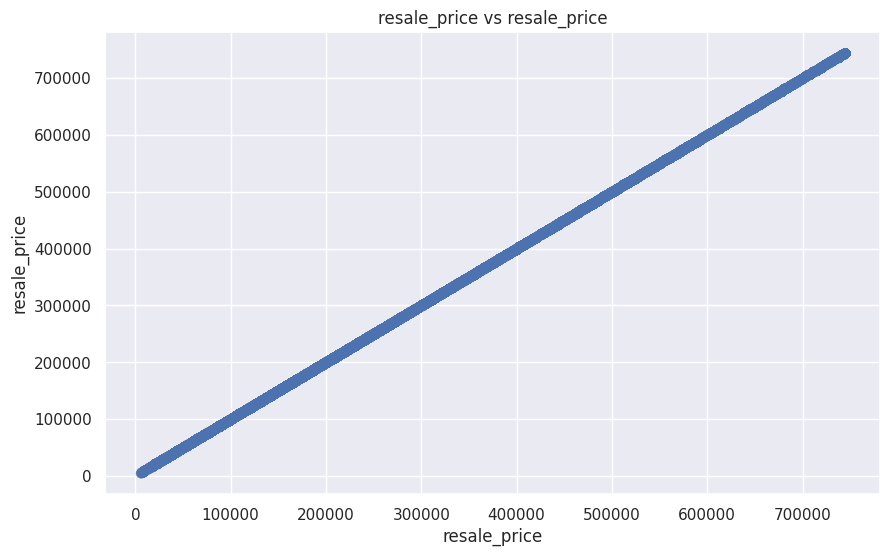

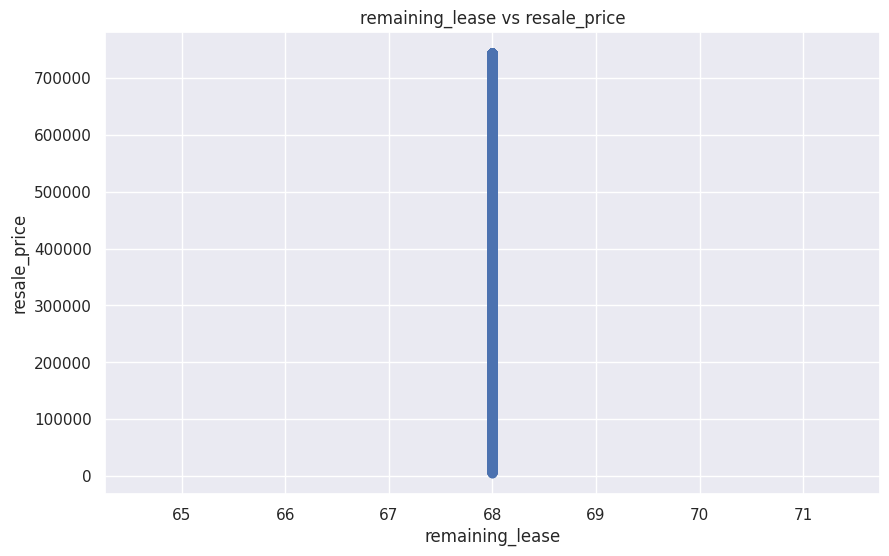

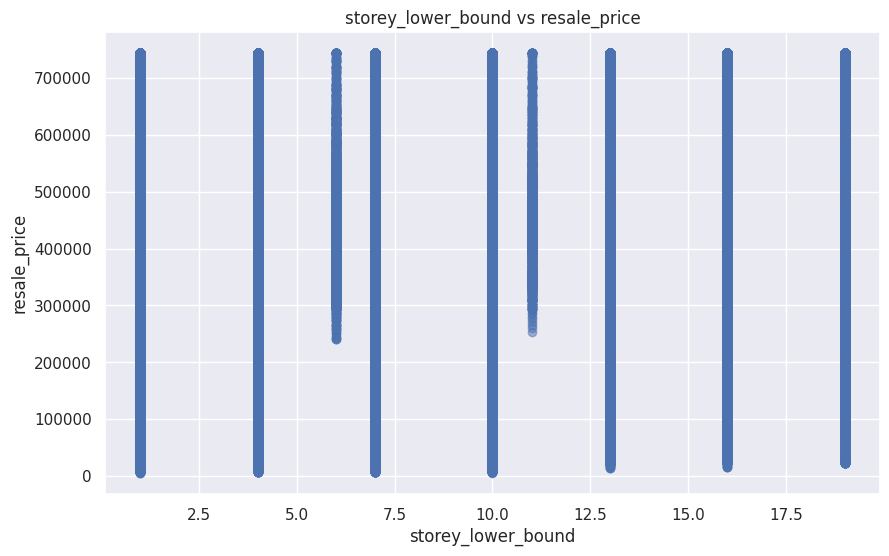

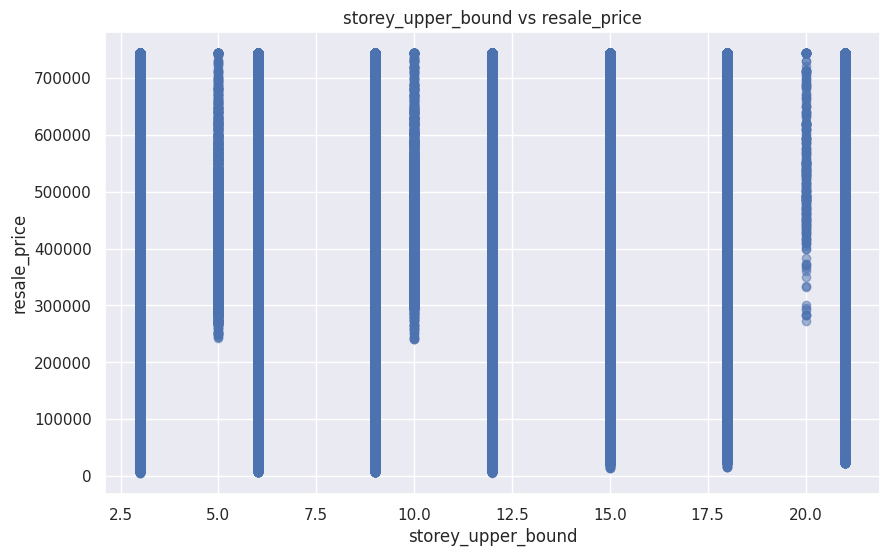

In [ ]:
features = [ 'block',
 'floor_area_sqm',
 'lease_commence_date',
 'resale_price',
 'remaining_lease',
'storey_lower_bound',
'storey_upper_bound']
target = 'resale_price'
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df[target], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}')
    plt.show()

**Encoding Categorical Variables**

In [ ]:
#using encoding make a copy
df1=df.copy()

object_data_cols = [var for var in df.columns if df[var].dtype == 'object']
object_data_cols

['town', 'flat_type', 'street_name', 'flat_model']

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Initialize the Encoder
le= LabelEncoder()

In [ ]:
# list unique street names
streets = df1['street_name'].unique()
# map the streets to povide input to ML model
streets_mapping = {street: idx + 1 for idx, street in enumerate(streets)}
streets_mapping

{'ANG MO KIO AVE 1': 1,
 'ANG MO KIO AVE 3': 2,
 'ANG MO KIO AVE 4': 3,
 'ANG MO KIO AVE 10': 4,
 'ANG MO KIO AVE 5': 5,
 'ANG MO KIO AVE 8': 6,
 'ANG MO KIO AVE 6': 7,
 'ANG MO KIO AVE 9': 8,
 'ANG MO KIO AVE 2': 9,
 'BEDOK RESERVOIR RD': 10,
 'BEDOK NTH ST 3': 11,
 'BEDOK STH RD': 12,
 'NEW UPP CHANGI RD': 13,
 'BEDOK NTH RD': 14,
 'BEDOK STH AVE 1': 15,
 'CHAI CHEE RD': 16,
 'CHAI CHEE DR': 17,
 'BEDOK NTH AVE 4': 18,
 'BEDOK STH AVE 3': 19,
 'BEDOK STH AVE 2': 20,
 'BEDOK NTH ST 2': 21,
 'BEDOK NTH ST 4': 22,
 'BEDOK NTH AVE 2': 23,
 'BEDOK NTH AVE 3': 24,
 'BEDOK NTH AVE 1': 25,
 'BEDOK NTH ST 1': 26,
 'CHAI CHEE ST': 27,
 'SIN MING RD': 28,
 'SHUNFU RD': 29,
 'BT BATOK ST 11': 30,
 'BT BATOK WEST AVE 8': 31,
 'BT BATOK WEST AVE 6': 32,
 'BT BATOK ST 21': 33,
 'BT BATOK EAST AVE 5': 34,
 'BT BATOK EAST AVE 4': 35,
 'HILLVIEW AVE': 36,
 'BT BATOK CTRL': 37,
 'BT BATOK ST 31': 38,
 'BT BATOK EAST AVE 3': 39,
 'TAMAN HO SWEE': 40,
 'TELOK BLANGAH CRES': 41,
 'BEO CRES': 42,
 'TELOK B

In [ ]:
# alter the column with the mapped numbers
df1['street_name'] = df1['street_name'].map(streets_mapping)

# Display the DataFrame
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1 ROOM,309.0,1,31.0,Improved,1977.0,6000.0,68.0,1990,1,4,6


In [ ]:
df1['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [ ]:
category_mapping = {
    '1 ROOM': 1,
    '2 ROOM': 2,
    '3 ROOM': 3,
    '4 ROOM': 4,
    '5 ROOM': 5,
    'EXECUTIVE': 6,
    'MULTI GENERATION': 7
}

# alter the column with the mapped numbers
df1['flat_type'] =df1['flat_type'].map(category_mapping)

# Display the DataFrame
df1.head(2)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1,309.0,1,31.0,Improved,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1,309.0,1,31.0,Improved,1977.0,6000.0,68.0,1990,1,4,6


In [ ]:
# Create a mapping of 'flat_model' values to numbers
flat_model_mapping = {
    'IMPROVED': 1,
    'NEW GENERATION': 2,
    'MODEL A': 3,
    'STANDARD': 4,
    'SIMPLIFIED': 5,
    'MODEL A-MAISONETTE': 6,
    'APARTMENT': 7,
    'MAISONETTE': 8,
    'TERRACE': 9,
    '2-ROOM': 10,
    'IMPROVED-MAISONETTE': 11,
    'MULTI GENERATION': 12,
    'PREMIUM APARTMENT': 13,
    'Improved': 14,
    'New Generation': 15,
    'Model A': 16,
    'Standard': 17,
    'Apartment': 18,
    'Simplified': 19,
    'Model A-Maisonette': 20,
    'Maisonette': 21,
    'Multi Generation': 22,
    'Adjoined flat': 23,
    'Premium Apartment': 24,
    'Terrace': 25,
    'Improved-Maisonette': 26,
    'Premium Maisonette': 27,
    '2-room': 28,
    'Model A2': 29,
    'DBSS': 30,
    'Type S1': 31,
    'Type S2': 32,
    'Premium Apartment Loft': 33,
    '3Gen': 34
}

# Map 'flat_model' values to numbers
df1['flat_model'] =df1['flat_model'].map(flat_model_mapping)

# Display the DataFrame
df1.head(3)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,ANG MO KIO,1,309.0,1,31.0,14,1977.0,9000.0,68.0,1990,1,10,12
1,ANG MO KIO,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,4,6
2,ANG MO KIO,1,309.0,1,31.0,14,1977.0,8000.0,68.0,1990,1,10,12


In [ ]:
# Create a mapping of 'town' values to numbers
town_mapping = {
    'ANG MO KIO': 1,
    'BEDOK': 2,
    'BISHAN': 3,
    'BUKIT BATOK': 4,
    'BUKIT MERAH': 5,
    'BUKIT TIMAH': 6,
    'CENTRAL AREA': 7,
    'CHOA CHU KANG': 8,
    'CLEMENTI': 9,
    'GEYLANG': 10,
    'HOUGANG': 11,
    'JURONG EAST': 12,
    'JURONG WEST': 13,
    'KALLANG/WHAMPOA': 14,
    'MARINE PARADE': 15,
    'QUEENSTOWN': 16,
    'SENGKANG': 17,
    'SERANGOON': 18,
    'TAMPINES': 19,
    'TOA PAYOH': 20,
    'WOODLANDS': 21,
    'YISHUN': 22,
    'LIM CHU KANG': 23,
    'SEMBAWANG': 24,
    'BUKIT PANJANG': 25,
    'PASIR RIS': 26,
    'PUNGGOL': 27
}

# Map 'town' values to numbers
df1['town'] = df1['town'].map(town_mapping)

# Display the DataFrame
df1.head(4)

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
0,1,1,309.0,1,31.0,14,1977.0,9000.0,68.0,1990,1,10,12
1,1,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,4,6
2,1,1,309.0,1,31.0,14,1977.0,8000.0,68.0,1990,1,10,12
3,1,1,309.0,1,31.0,14,1977.0,6000.0,68.0,1990,1,7,9


In [ ]:
# save the processed data for the deployment
df1.to_csv('final.csv')

**Correlation**


In [ ]:
# correlation matrix (ranges from 1 to -1)
corrm = df1.select_dtypes(include=['number']).corr()
#corrm.to_csv('corrm.csv')
corrm

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
town,1.000000,0.209331,0.052433,0.588039,0.202336,0.163194,0.334835,0.123287,NaN,0.124099,0.006239,-0.019601,-0.019327
flat_type,0.209331,1.000000,0.127949,0.389810,0.954839,0.243892,0.417112,0.608414,NaN,0.103118,0.004061,0.078408,0.078746
block,0.052433,0.127949,1.000000,0.052449,0.187393,-0.001123,0.016388,-0.076695,NaN,-0.111557,-0.002072,-0.122982,-0.123034
street_name,0.588039,0.389810,0.052449,1.000000,0.359201,0.354457,0.740480,0.378493,NaN,0.316705,0.012740,0.080105,0.080776
floor_area_sqm,0.202336,0.954839,0.187393,0.359201,1.000000,0.201665,0.396280,0.583669,NaN,0.065103,0.002759,0.044782,0.044973
flat_model,0.163194,0.243892,-0.001123,0.354457,0.201665,1.000000,0.358720,0.246728,NaN,0.163600,0.003970,0.018669,0.019042
lease_commence_date,0.334835,0.417112,0.016388,0.740480,0.396280,0.358720,1.000000,0.539607,NaN,0.425692,0.016282,0.150145,0.150598
resale_price,0.123287,0.608414,-0.076695,0.378493,0.583669,0.246728,0.539607,1.000000,NaN,0.674458,0.026258,0.208045,0.210865
remaining_lease,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resale_year,0.124099,0.103118,-0.111557,0.316705,0.065103,0.163600,0.425692,0.674458,NaN,1.000000,-0.000483,0.094805,0.097009


**Heatmap**

<Axes: >

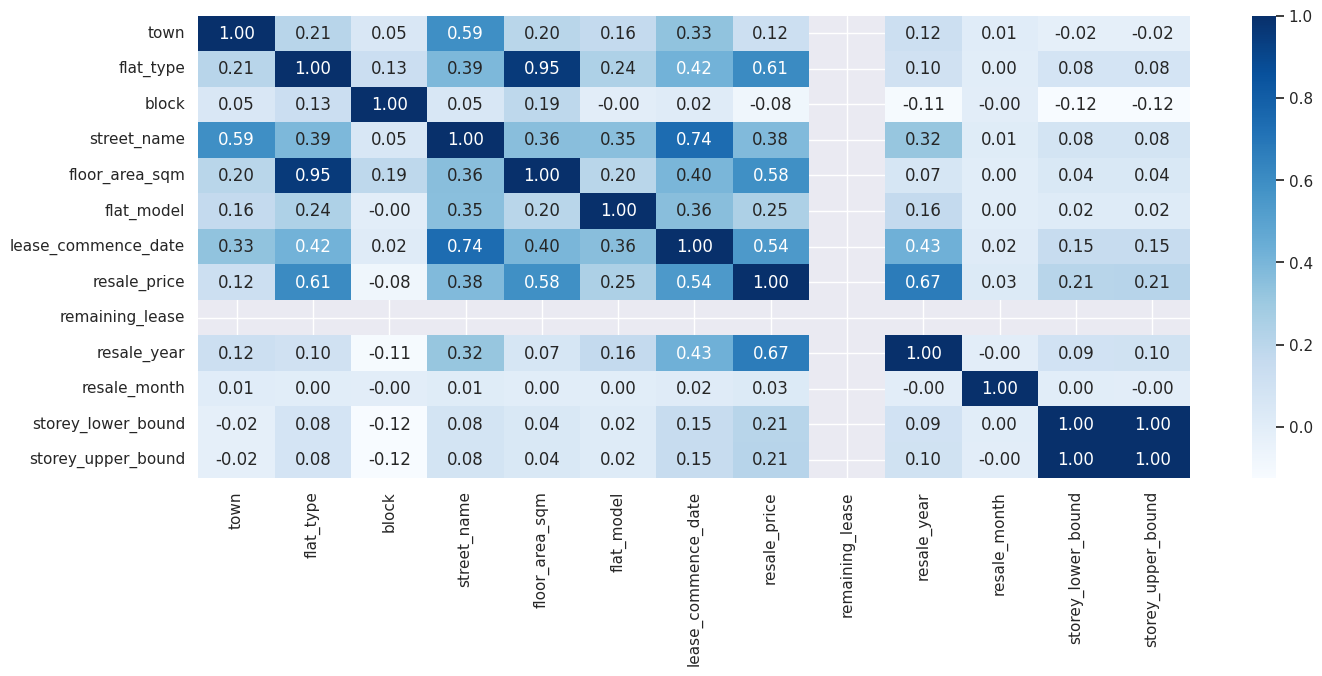

In [ ]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize=(16,6))
sns.heatmap(corrm,annot=True,cmap="Blues",fmt=".2f")

**MACHINE LEARNING**

Split

In [ ]:
# assign feature and target variable
X = df1.drop('resale_price', axis= 1)
y = df1['resale_price']
#splitting the data into training and testing sets with the ratio of 8:2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(730422, 12) (182606, 12) (730422,) (182606,)


**Scalling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled ,X_test_scaled

(array([[ 0.9431985 ,  2.09245324,  0.14113171, ..., -0.46858326,
         -0.12848805,  0.31857751],
        [ 0.04533588, -1.06940306, -1.11627495, ...,  0.4114548 ,
         -0.57877878, -0.58216502],
        [-1.49385717, -0.01545096, -0.95624138, ..., -1.34862131,
          0.09665732,  0.09339188],
        ...,
        [ 1.45626285,  1.03850114, -0.19417674, ..., -0.17523724,
          1.44752953,  1.44450568],
        [ 0.30186806, -0.01545096, -0.76572522, ...,  0.4114548 ,
          1.44752953,  1.44450568],
        [-1.23732499, -0.01545096,  0.44214724, ...,  0.70480082,
         -0.57877878, -0.58216502]]),
 array([[-1.23732499, -0.01545096, -1.11246463, ..., -0.17523724,
          1.44752953,  1.44450568],
        [-0.0829302 , -0.01545096,  0.92224796, ...,  1.29149285,
          0.09665732,  0.09339188],
        [-0.33946238,  1.03850114,  2.50734242, ..., -1.34862131,
         -0.57877878, -0.58216502],
        ...,
        [ 1.45626285,  1.03850114,  0.58693952, ..., -

**Model_Fit**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb
from xgboost import XGBRegressor  # Use XGBRegressor for regression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

 **Linear Regression**

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

# Initialize imputer for numeric data
imputer = SimpleImputer(strategy='mean')

# Fit imputer on train data and transform both train and test
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(X_train_imputed, y_train)

print(linear_model.predict(X_test_imputed))
print(y_test)


[381717.40666605 219338.98592322 387883.54375624 ... 459775.82986398
 102820.23081432 218423.65833941]
522950    288000.0
222106    223000.0
568760    375000.0
329613    150000.0
805502    466000.0
            ...   
905241    330000.0
288075    290000.0
681054    492000.0
109297    118000.0
95326     202000.0
Name: resale_price, Length: 182606, dtype: float64


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

linear_model.fit(X_train_imputed, y_train)


LinearRegression()

In [ ]:
linear_model.score(X_test_imputed, y_test)


0.7883046073753008

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a pipeline that imputes missing values then fits the model
pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),
    LinearRegression(fit_intercept=True)
)

# Run cross-validation using the pipeline
cross_val_linear_model = cross_val_score(pipeline, X_train, y_train, cv=10).mean()

cross_val_linear_model


np.float64(0.7881237797902089)

K Nearest Neighbor Regression

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create a pipeline with imputation, scaling, and KNN regression
knn_pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),  # Handle missing values
    StandardScaler(),                 # Scale features
    KNeighborsRegressor(n_neighbors=5)  # KNN model
)

# Fit the pipeline on training data
knn_pipeline.fit(X_train, y_train)

# Predict on test data
y_pred_knn = knn_pipeline.predict(X_test)

# Evaluate predictions
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("Mean Absolute Error (MAE)    :", mae_knn)
print("Mean Squared Error (MSE)     :", mse_knn)
print("Root Mean Square Error (RMSE):", rmse_knn)
print("R-squared (R2) Score         :", r2_knn)


Mean Absolute Error (MAE)    : 28567.775791441687
Mean Squared Error (MSE)     : 1734081506.7123787
Root Mean Square Error (RMSE): 41642.30429157804
R-squared (R2) Score         : 0.9321071937563079


**Decision Tree Regression**

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create pipeline with imputation and Decision Tree regressor
dt_pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),   # Impute missing values
    DecisionTreeRegressor(max_depth=20, random_state=11)
)

# Fit the pipeline on training data
dt_pipeline.fit(X_train, y_train)

# Predict on test data
y_pred_dt = dt_pipeline.predict(X_test)

# Evaluate predictions
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean Absolute Error (MAE)    :", mae_dt)
print("Mean Squared Error (MSE)     :", mse_dt)
print("Root Mean Square Error (RMSE):", rmse_dt)
print("R-squared (R2) Score         :", r2_dt)


Mean Absolute Error (MAE)    : 17271.343711823363
Mean Squared Error (MSE)     : 651397695.1185977
Root Mean Square Error (RMSE): 25522.493904761694
R-squared (R2) Score         : 0.9744964597505451


**Random Forest Regression**

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create pipeline with imputation and Random Forest Regressor
rf_pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),  # Impute missing values
    RandomForestRegressor(random_state=42)
)

# Fit pipeline on training data
rf_pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = rf_pipeline.predict(X_test)

# Evaluate predictions
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rf_r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", rf_r2)


Mean Absolute Error (MAE)    : 13745.3015314957
Mean Squared Error (MSE)     : 393938188.93340206
Root Mean Square Error (RMSE): 19847.87618193448
R-squared (R2) Score         : 0.9845765213286006


**Xg Boost Regression**

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create pipeline with imputation and XGBoost Regressor
xgb_pipeline = make_pipeline(
    SimpleImputer(strategy='mean'),  # Impute missing values
    XGBRegressor()
)

# Fit the pipeline on training data
xgb_pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = xgb_pipeline.predict(X_test)

# Evaluate predictions
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
xgb_r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", xgb_r2)


Mean Absolute Error (MAE)    : 16763.406486029104
Mean Squared Error (MSE)     : 546420293.1381135
Root Mean Square Error (RMSE): 23375.63460396559
R-squared (R2) Score         : 0.9786065378437828


**Finalizeing Models**

In [ ]:
models = [ 'KNeighborsRegressor','DecisionTreeRegressor', 'RandomForestRegressor', 'XGBRegressor']
score = [r2_knn,r2_dt, rf_r2, xgb_r2]

fig=px.bar(x=models, y=score,title='R_2 of Regression Models')
fig.show()

print("FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE\n")
max_score = max(score)  # Initialize max_score with the maximum value in the score list
max_model = ""

for model, score_value in zip(models, score):
    print(model, score_value)
    if score_value == max_score:
        max_model = model

print(f"\nModel: {max_model} contain Maximum R2_Score: {max_score} ")

FINDING BEST FIT MODEL FOR EVALUATION BASED ON R_2 SCORE

KNeighborsRegressor 0.9321071937563079
DecisionTreeRegressor 0.9744964597505451
RandomForestRegressor 0.9845765213286006
XGBRegressor 0.9786065378437828

Model: RandomForestRegressor contain Maximum R2_Score: 0.9845765213286006 


**Suggestion**

In [ ]:
RandomForestRegressor.feature_importances_

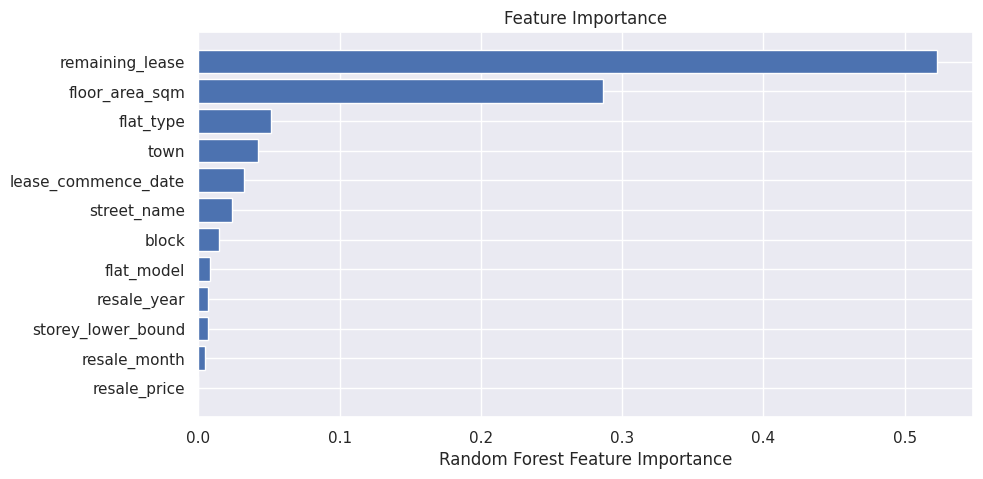

In [ ]:
sorted_idx = rf_pipeline.named_steps['randomforestregressor'].feature_importances_.argsort()

plt.figure(figsize=(10, 5))
plt.barh(df.columns[sorted_idx], rf_pipeline.named_steps['randomforestregressor'].feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")
plt.show()


**Save the model**

In [ ]:
model = rf_pipeline.fit(X_train, y_train)

In [ ]:
model

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

**Predicting**

In [ ]:
# get sample to predict the resale price
pre_df =df1.sample(n=5)
pre_df

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,resale_year,resale_month,storey_lower_bound,storey_upper_bound
890802,2,3,108.0,14,67.0,15,1977.0,365000.0,68.0,2023,2,1,3
775438,14,4,17.0,280,86.0,16,2001.0,425000.0,68.0,2018,6,4,6
889794,1,3,435.0,4,67.0,15,1979.0,345000.0,68.0,2023,3,1,3
34229,19,5,122.0,276,122.0,14,1988.0,183800.0,68.0,1992,8,10,12
661360,22,6,877.0,305,145.0,21,1987.0,670000.0,68.0,2012,4,6,10


In [ ]:
# drop the resale price column
A = pre_df.drop('resale_price', axis = 1)

Resale **Price**

In [ ]:
# Make predictions on the sample
pre_pred = rf_pipeline.predict(A)
pre_pred

array([357991.  , 437086.64, 349818.88, 145640.  , 654480.  ])